### Tasks

1. Using the Blue Jays data, fit a regression model to predict body mass using head size, and plot the residual plot and the qqplot.  What do they tell you about the regression model.

2. Find and interpret the slope and intercept for this regression model in the context of these data.

3. Predict the body mass of a blue with a head size of 57mm and a head 53 mm.

4. Find $r^2$ for this model and interpret in the context of these data.

5. Create a $99\%$ confidence interval for the slope and interpret it.

6. Find the p-value for the hypothesis test of the slope.  What do you conclude from that?

7. Find an interpret the $RMSE$ for this model.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.stats as st
from scipy.stats import pearsonr
import statsmodels.api as sm 
import pylab as py 

# sklearn is new and you may have to install it,  the code is 
# pip3 install scikit-learn
from sklearn.linear_model import LinearRegression

In [22]:
bluejay = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/BlueJays.csv", na_values=['NA'])
# remove rows with missing data
bluejay.dropna(inplace=True)
bluejay.head()



,Unnamed: 0,BirdID,KnownSex,BillDepth,BillWidth,BillLength,Head,Mass,Skull,Sex
0,1,0000-00000,M,8.26,9.21,25.92,56.58,73.30,30.66,1
1,2,1142-05901,M,8.54,8.76,24.99,56.36,75.10,31.38,1
2,3,1142-05905,M,8.39,8.78,26.07,57.32,70.25,31.25,1
3,4,1142-05907,F,7.78,9.30,23.48,53.77,65.50,30.29,0
4,5,1142-05909,M,8.71,9.84,25.47,57.32,74.90,31.85,1


In [23]:
x=bluejay["Head"]
# y needs to be a one dimensional array so single brackets work
y=bluejay["Mass"]
beta_1, beta_0 = np.polyfit(x, y, deg=1)

print(beta_0)
print(beta_1)

-34.903893238606265
1.911554202415449


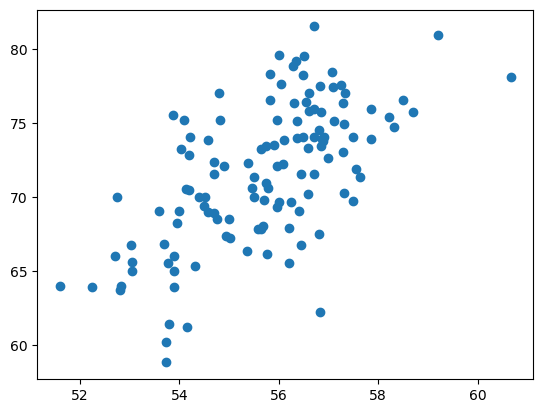

In [33]:
plt.scatter(x,y)

y = -34.9 + 1.9*x

In [25]:
model= LinearRegression()
# note below that the x needs to be a two dimensional array so we 
# need the double brackets here
x=bluejay[["Head"]]
# y needs to be a one dimensional array so single brackets work
y=bluejay["Mass"]
model.fit(x, y)

LinearRegression()

In [28]:
print(model.intercept_)
print(model.coef_)

-34.90389323860617
[1.9115542]


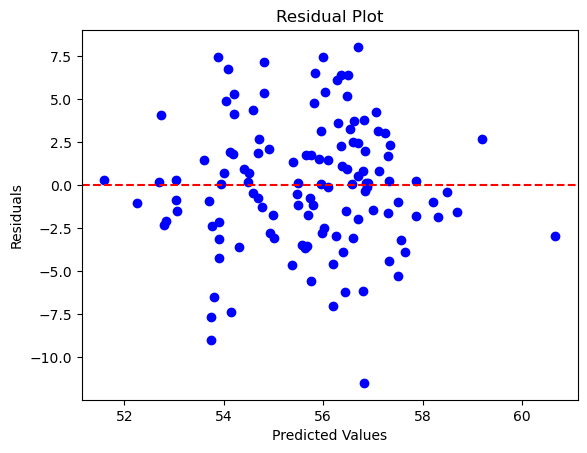

In [29]:
# using matplot

residuals = y - model.predict(x)

# Plot residuals
plt.scatter(x, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


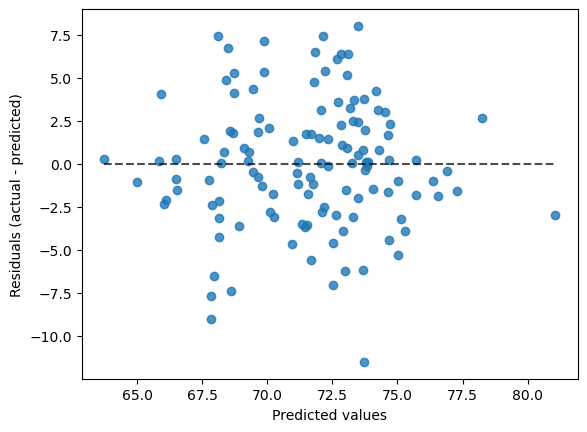

In [30]:
from sklearn.metrics import PredictionErrorDisplay
# the code below get the predict values for all of the values in x
y_hat = model.predict(x)
# below makes a 
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat)
display.plot()
plt.show()

In [35]:
# 57mm
print(model.intercept_ + model.coef_ * 57)
print(model.intercept_ + model.coef_ * 53)



[74.0546963]
[66.40847949]


In [37]:
r= np.corrcoef(bluejay["Head"], bluejay['Mass'])[0, 1]
print (r)

# or

corr, pvalue=pearsonr(bluejay["Head"], bluejay['Mass']) 
print(corr)

0.6294446961813482
